# Normal income distribution

## Defining functions to calculate expected utility given different contract parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [202]:
def contract(n, C, F, mu, sig):
    '''
    n = no. participants
    C = contribution percentage
    F = service fee percentage
    mu = mean of income dist
    sig = sd of income dist
    '''
    mu_np = C * mu # mu for fraction of income without contract
    sig_np = C * sig # sigma for fraction of income with contract
    mu_p = C * (1 - F) * mu # mu for fraction of income with contract
    sig_p = C * (1 - F) * mu / np.sqrt(n) # sigma for fraction of income without contract
    return mu_np, sig_np, mu_p, sig_p

In [203]:
def expected_utility(lam, mu, sig):
    '''
    lam = risk aversion coef
    mu = mean of income dist
    sig = sd of income dist
    '''
    return mu - lam*sig**2 / 2

In [204]:
def min_risk_reduction(lam, mu, sig, C, F):
    '''
    lam = risk aversion coef
    mu = mean of income dist
    sig = sd of income dist
    C = contribution percentage
    F = service fee percentage
    '''
    ratio = np.sqrt(1.0 - (2.0 * F * mu)/(lam * C * sig**2))
    return ratio

## Testing sensitivity to n (number of participants)

In [205]:
n = np.arange(3,21,1) # typical pools have 3 - 4 participants. 
# we extend the range to 20 to see the effect of large n
C = 0.1 # typical C range is 5 - 15%
F = 0.01 # arbitrary at the moment, will be adjusted after call with Pando CEO
mu = 1 # set to 1 for simplicity
sig = 1 # set to 1 for simplicity
lam = 1 # set to 1 for simplicity

In [206]:
mu_np, sig_np, mu_p, sig_p = contract(n, C, F, mu, sig)

In [207]:
mu_np = mu_a*np.ones(len(sig_p))
sig_np = sig_a*np.ones(len(sig_p))
mu_p = mu_p*np.ones(len(sig_p))

In [208]:
data = np.transpose(np.array([mu_np, sig_np, mu_p, sig_p]))
dists = pd.DataFrame(data=data, index=n, columns=['mu_np', 'sig_np', 'mu_p', 'sig_p'])
dists

,mu_np,sig_np,mu_p,sig_p
3,0.1,0.1,0.099,0.057158
4,0.1,0.1,0.099,0.049500
5,0.1,0.1,0.099,0.044274
6,0.1,0.1,0.099,0.040417
7,0.1,0.1,0.099,0.037418
8,0.1,0.1,0.099,0.035002
9,0.1,0.1,0.099,0.033000
10,0.1,0.1,0.099,0.031307
11,0.1,0.1,0.099,0.029850
12,0.1,0.1,0.099,0.028579


### Question 1: Does risk decrease faster than mean with the contract? How does this compare to risk/mean without the contract?

In [209]:
ratio_np = sig_np/mu_np
ratio_p = sig_p/mu_p

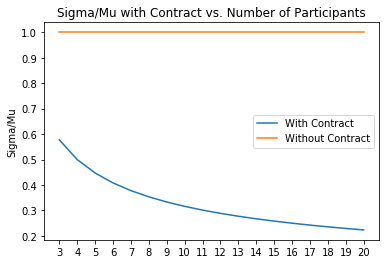

In [210]:
plt.plot(n, ratio_p)
plt.plot(n, ratio_np)
plt.title('Sigma/Mu with Contract vs. Number of Participants')
plt.ylabel('Sigma/Mu')
plt.xticks(n)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Sigma/mu is less than 1 for all numbers of participants, which means that risk decreases at a faster rate than the mean - this confirms our analytical findings. The rate of decrease in sigma/mu decreases as pools get large. Sigma/mu is smaller with the contract than without the contract for all numbers of participants, which also confirms our analytical findings.

### Question 2: Given the reduction in mu due to the fee, how many participants do we need to achieve the necessary risk reduction with the contract to result in equal or greater utility than without the contract (if at all)?

#### Checking that our formula for deriving the minimum risk reduction is correct

In [211]:
mu_test = mu * C # 0.1
sig_test = sig * C # 0.1
mu_p_test = mu * C * (1 - F) # 0.97
mrr = min_risk_reduction(lam, mu, sig, C, F) 
sig_p_test = mrr*sig_test # 0.063
mrr

0.8944271909999159

In [212]:
util_test = expected_utility(lam, mu_test, sig_test)
util_p_test = expected_utility(lam, mu_p_test, sig_p_test)
[util_test, util_p_test] # values of utility are equal

[0.095, 0.095]

#### Graphing the rate of risk reduction against the minimum risk reduction to achieve equal utility

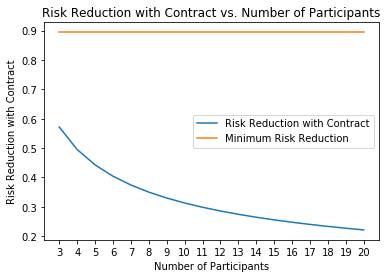

In [213]:
plt.plot(n, sig_p/sig_np)
plt.plot(n, mrr*np.ones(len(n)))
plt.title('Risk Reduction with Contract vs. Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Risk Reduction with Contract')
plt.xticks(n)
plt.legend(('Risk Reduction with Contract', 'Minimum Risk Reduction'),loc='best')
plt.show()

Sigma_p/sigma is less than the minimum risk reduction for all numbers of participants, which means that pool members always achieve greater utility with the contract than without the contract. The rate of decrease in sigma_p/sigma decreases as pools get large.

### Question 3: How does utility change as number of pool members changes? How does utility with the contract compare to utility without the contract?

In [214]:
util_p = expected_utility(lam, mu_p, sig_p)
util_np = expected_utility(lam, mu_np, sig_np)

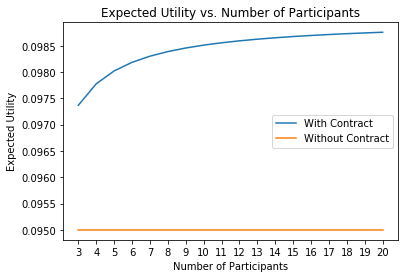

In [215]:
plt.plot(n, util_p)
plt.plot(n, util_np)
plt.title('Expected Utility vs. Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Expected Utility')
plt.xticks(n)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Expected utility is higher with the contract than without the contract for all numbers of participants. The rate of increase in expected utility decreases as pools get large.

## Testing sensitivity to C (pool contribution percentage)

In [216]:
n = 3
C = np.arange(0.05, 0.16, 0.01) # typical contribution percentages range from 5-15% according to Pando website
F = 0.01
mu = 1
sig = 1
lam = 1

In [217]:
mu_np, sig_np, mu_p, sig_p = contract(n, C, F, mu, sig)

In [218]:
data = np.transpose(np.array([mu_np, sig_np, mu_p, sig_p]))
dists = pd.DataFrame(data=data, index=C, columns=['mu_np', 'sig_np', 'mu_p', 'sig_p'])
dists

,mu_np,sig_np,mu_p,sig_p
0.05,0.05,0.05,0.0495,0.028579
0.06,0.06,0.06,0.0594,0.034295
0.07,0.07,0.07,0.0693,0.040010
0.08,0.08,0.08,0.0792,0.045726
0.09,0.09,0.09,0.0891,0.051442
0.10,0.10,0.10,0.0990,0.057158
0.11,0.11,0.11,0.1089,0.062873
0.12,0.12,0.12,0.1188,0.068589
0.13,0.13,0.13,0.1287,0.074305
0.14,0.14,0.14,0.1386,0.080021


### Question 1: Does risk decrease faster than mean with the contract? How does this compare to risk/mean without the contract?

In [219]:
ratio_np = sig_np/mu_np
ratio_p = sig_p/mu_p

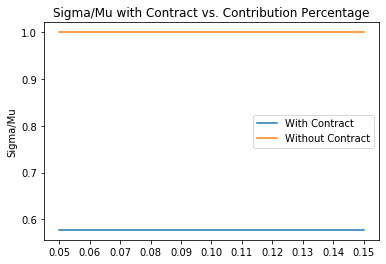

In [220]:
plt.plot(C, ratio_p)
plt.plot(C, ratio_np)
plt.title('Sigma/Mu with Contract vs. Contribution Percentage')
plt.ylabel('Sigma/Mu')
plt.xticks(C)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Sigma/mu is less than 1 for all numbers of participants, which means that risk decreases at a faster rate than the mean - this confirms our analytical findings. Sigma/mu is constant for all contribution percentages. This is due to the fact that sigma/mu with the contract only differs from sigma/mu without the contract by a factor of (1 - F)/n, which is constant when we look at sensitivity to C.

### Question 2: Given the reduction in mu due to the fee, what C do we need to achieve the necessary risk reduction with the contract to result in equal or greater utility than without the contract (if at all)?

#### Graphing the rate of risk reduction against the minimum risk reduction to achieve equal utility

In [221]:
mrr = min_risk_reduction(lam, mu, sig, C, F) 
mrr

array([0.77459667, 0.81649658, 0.84515425, 0.8660254 , 0.8819171 ,
       0.89442719, 0.90453403, 0.91287093, 0.91986621, 0.9258201 ,
       0.93094934])

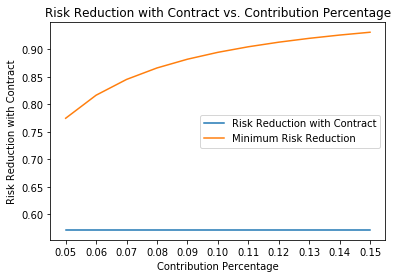

In [222]:
plt.plot(C, sig_p/sig_np)
plt.plot(C, mrr)
plt.title('Risk Reduction with Contract vs. Contribution Percentage')
plt.xlabel('Contribution Percentage')
plt.ylabel('Risk Reduction with Contract')
plt.xticks(C)
plt.legend(('Risk Reduction with Contract', 'Minimum Risk Reduction'),loc='best')
plt.show()

Sigma_p/sigma is less than the minimum risk reduction for all numbers of participants, which means that pool members always achieve greater utility with the contract than without the contract. Sigma_p/sigma is constant for all contribution percentages. This is due to the fact that sigma_p only differs from sigma by a fact of (1 - F)/sqrt(n), which is constant when we look at sensitivity to C.

### Question 3: How does utility change as C changes? How does utility with the contract compare to utility without the contract?

In [223]:
util_p = expected_utility(lam, mu_p, sig_p)
util_np = expected_utility(lam, mu_np, sig_np)

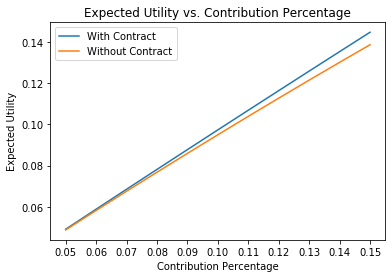

In [224]:
plt.plot(C, util_p)
plt.plot(C, util_np)
plt.title('Expected Utility vs. Contribution Percentage')
plt.xlabel('Contribution Percentage')
plt.ylabel('Expected Utility')
plt.xticks(C)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Expected utility is slightly higher with the contract than without the contract for all numbers of participants and increases as C increases. The difference in expected utility increases as C increases. This is due to the fact that expected utility only differs by a factor of (1 - F) for mu and (1 - F)^2/n for sigma^2, which results in a linear trend with a slightly greater slope.

## Testing sensitivity to F (service fee percentage)

In [225]:
n = 3
C = 0.1 
F = np.arange(0.005, 0.05, 0.005)
mu = 1
sig = 1
lam = 1

In [226]:
mu_np, sig_np, mu_p, sig_p = contract(n, C, F, mu, sig)

In [227]:
mu_np = mu_np * np.ones(len(mu_p))
sig_np = sig_np * np.ones(len(sig_p))

In [228]:
data = np.transpose(np.array([mu_np, sig_np, mu_p, sig_p]))
dists = pd.DataFrame(data=data, index=F, columns=['mu_np', 'sig_np', 'mu_p', 'sig_p'])
dists

,mu_np,sig_np,mu_p,sig_p
0.005,0.1,0.1,0.0995,0.057446
0.010,0.1,0.1,0.0990,0.057158
0.015,0.1,0.1,0.0985,0.056869
0.020,0.1,0.1,0.0980,0.056580
0.025,0.1,0.1,0.0975,0.056292
0.030,0.1,0.1,0.0970,0.056003
0.035,0.1,0.1,0.0965,0.055714
0.040,0.1,0.1,0.0960,0.055426
0.045,0.1,0.1,0.0955,0.055137


### Question 1: Does risk decrease faster than mean with the contract? How does this compare to risk/mean without the contract?

In [229]:
ratio_np = sig_np/mu_np
ratio_p = sig_p/mu_p

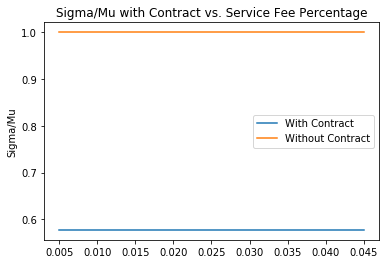

In [230]:
plt.plot(F, ratio_p)
plt.plot(F, ratio_np)
plt.title('Sigma/Mu with Contract vs. Service Fee Percentage')
plt.ylabel('Sigma/Mu')
plt.xticks(F)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Sigma/mu is less than 1 for all numbers of participants, which means that risk decreases at a faster rate than the mean - this confirms our analytical findings. Sigma/mu is constant for all contribution percentages. This is due to the fact that sigma/mu with the contract only differs from sigma/mu without the contract by a factor of C/n, which is constant when we look at sensitivity to F.

### Question 2: Given the reduction in mu due to the fee, what F do we need to achieve the necessary risk reduction with the contract to result in equal or greater utility than without the contract (if at all)?

#### Graphing the rate of risk reduction against the minimum risk reduction to achieve equal utility

In [231]:
mrr = min_risk_reduction(lam, mu, sig, C, F) 
mrr

array([0.9486833 , 0.89442719, 0.83666003, 0.77459667, 0.70710678,
       0.63245553, 0.54772256, 0.4472136 , 0.31622777])

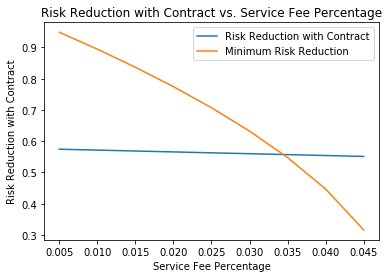

In [232]:
plt.plot(F, sig_p/sig_np)
plt.plot(F, mrr)
plt.title('Risk Reduction with Contract vs. Service Fee Percentage')
plt.xlabel('Service Fee Percentage')
plt.ylabel('Risk Reduction with Contract')
plt.xticks(F)
plt.legend(('Risk Reduction with Contract', 'Minimum Risk Reduction'),loc='best')
plt.show()

Sigma_p/sigma is less than the minimum risk reduction for all fee percentages less than 0.035, which means that pool members achieve greater utility with fees less than this amount. Sigma_p/sigma decreases at a constant rate due to the fact that sigma_p differs from sigma by a factor of (1 - F)/sqrt(n), which decreases slowly as F increases; the minimum risk reduction ratio decreases the way it does because it is calculated by taking the square root of a value that decreases as F increases.

### Question 3: How does utility change as F changes? How does utility with the contract compare to utility without the contract?

In [233]:
util_p = expected_utility(lam, mu_p, sig_p)
util_np = expected_utility(lam, mu_np, sig_np)

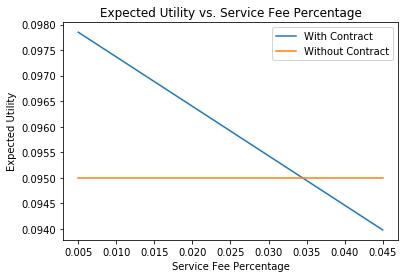

In [234]:
plt.plot(F, util_p)
plt.plot(F, util_np)
plt.title('Expected Utility vs. Service Fee Percentage')
plt.xlabel('Service Fee Percentage')
plt.ylabel('Expected Utility')
plt.xticks(F)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Expected utility decreases at a constant rate as fee increases. Expected utility is higher with the contract up until a service fee percentage of 0.035, which is where pool members begin to achieve higher utility without the contract. This yields interesting implications on how Pando can see service fee percentages based on utility, which I will further explore in future analyses.

# Simple bimodal income distribution

## Defining functions to calculate expected utility given different contract parameters

In [3]:
def eu_p(lam, m, s, p, n, C, F):
    '''
    lam = risk aversion coef
    m = normal case income
    s = income multiple in success case
    p = probability of success
    '''
    mu = C * (1 - F) * m * (1 + p * s)
    sig = C * (1 - F) * np.sqrt(p * (1 - p) / n)
    e = mu - lam*sig**2 / 2
    util = 1 - np.exp(-lam*e)
    
    return util

In [4]:
def eu_np(lam, m, s, p, C):
    '''
    lam = risk aversion coef
    m = normal case income
    s = income multiple in success case
    p = probability of success
    '''
    util = 1 - np.exp(-lam * C * m) + p * np.exp(-lam * C * m) * (1 - np.exp(-lam * C * m * s))
    tf = -1 * np.log(-(util - 1)) / lam
    
    return util

## Testing sensitivity to p (success probability)

In [29]:
n = 3
C = 0.1 
F = 0.01
m = 1 # set to 1 for simplicity
s = 3 # set to 10 for simplicity
p = np.arange(0.01, 0.05, 0.005) # set to 0.1 for simplicity
lam = 1 # set to 1 for simplicity

### Question 1: How does utility change as p changes? How does utility with the contract compare to utility without the contract?

In [30]:
util_p = eu_p(lam, m, s, p, n, C, F)
util_np = eu_np(lam, m, s, p, C) 

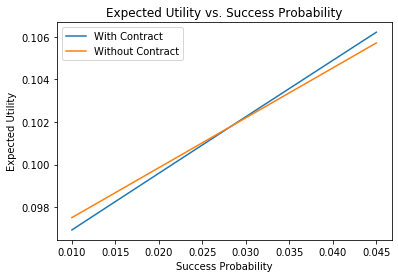

In [31]:
plt.plot(p, util_p)
plt.plot(p, util_np)
plt.title('Expected Utility vs. Success Probability')
plt.xlabel('Success Probability')
plt.ylabel('Expected Utility')
# plt.xticks(p)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Utility with contract increases as p increases. Higher than utility without contract for all values of p greater than ~0.03. Interested to explore what success probability is necessary to achieve greater or equal utility given decrease in mean

## Testing sensitivity to s (success multiple)

In [85]:
n = 3
C = 0.1 
F = 0.01
m = 1 # set to 1 for simplicity
s = np.arange(1, 3.25, 0.25) # set to 10 for simplicity
p = 0.1 # set to 0.1 for simplicity
lam = 1 # set to 1 for simplicity

### Question 1: How does utility change as s changes? How does utility with the contract compare to utility without the contract?

In [86]:
util_p = eu_p(lam, m, s, p, n, C, F)
util_np = eu_np(lam, m, s, p, C) 

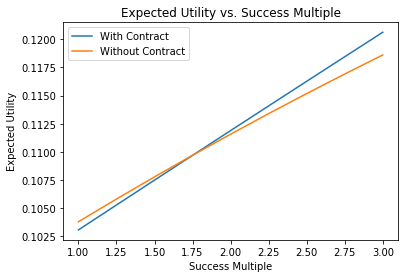

In [87]:
plt.plot(s, util_p)
plt.plot(s, util_np)
plt.title('Expected Utility vs. Success Multiple')
plt.xlabel('Success Multiple')
plt.ylabel('Expected Utility')
# plt.xticks(s)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Utility with contract increases as s increases. Higher than utility without contract for all values of greater than ~1.75. Interested to explore what success multiple is necessary to achieve greater or equal utility given decrease in mean

## Testing sensitivity to n (number of participants)

In [32]:
n = np.arange(3,21,1) # typical pools have 3 - 4 participants. 
# we extend the range to 20 to see the effect of large n
C = 0.1 # typical C range is 5 - 15%
F = 0.01 # arbitrary at the moment, will be adjusted after call with Pando CEO
m = 1 # set to 1 for simplicity
s1 = 3 # set to 10 for simplicity
s2 = 10 
p1 = 0.01 # set to 0.1 for simplicity
p2 = 0.1
lam = 1 # set to 1 for simplicity

### Question 1: How does utility change as number of pool members changes? How does utility with the contract compare to utility without the contract?

In [33]:
util_p1 = eu_p(lam, m, s1, p1, n, C, F)
util_np1 = eu_np(lam, m, s1, p1, C) * np.ones(len(n))

util_p2 = eu_p(lam, m, s1, p2, n, C, F)
util_np2 = eu_np(lam, m, s1, p2, C) * np.ones(len(n))

util_p3 = eu_p(lam, m, s2, p1, n, C, F)
util_np3 = eu_np(lam, m, s2, p1, C) * np.ones(len(n))

util_p4 = eu_p(lam, m, s2, p2, n, C, F)
util_np4 = eu_np(lam, m, s2, p2, C) * np.ones(len(n))

Text(0.005, 0.5, 'Expected Utility')

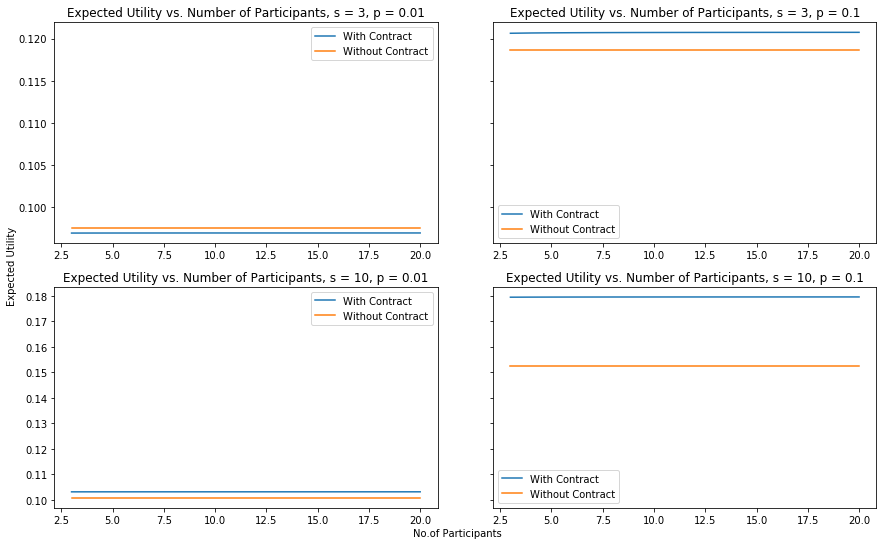

In [39]:
fig, axs = plt.subplots(2, 2, sharey='row',tight_layout=True,figsize=(12.5,7.5))
axs[0][0].plot(n, util_p1, label='With Contract')
axs[0][0].plot(n, util_np1, label='Without Contract')
axs[0][0].legend(loc='best')
axs[0][0].set_title('Expected Utility vs. Number of Participants, s = 3, p = 0.01')

axs[0][1].plot(n, util_p2, label='With Contract')
axs[0][1].plot(n, util_np2,label='Without Contract')
axs[0][1].legend(loc='best')
axs[0][1].set_title('Expected Utility vs. Number of Participants, s = 3, p = 0.1')

axs[1][0].plot(n, util_p3, label='With Contract')
axs[1][0].plot(n, util_np3, label='Without Contract')
axs[1][0].legend(loc='best')
axs[1][0].set_title('Expected Utility vs. Number of Participants, s = 10, p = 0.01')

axs[1][1].plot(n, util_p4, label='With Contract')
axs[1][1].plot(n, util_np4, label='Without Contract')
axs[1][1].legend(loc='best')
axs[1][1].set_title('Expected Utility vs. Number of Participants, s = 10, p = 0.1')

fig.text(0.5,0.005, "No.of Participants", ha="center", va="center")
fig.text(0.005,0.5, "Expected Utility", ha="center", va="center", rotation=90)

## Testing sensitivity to C (contribution percentage)

In [40]:
n = 3
C = np.arange(0.05, 0.16, 0.01) # typical contribution percentages range from 5-15% according to Pando website
F = 0.01
m = 1 # set to 1 for simplicity
s1 = 3 # set to 10 for simplicity
s2 = 10
p1 = 0.01 # set to 0.1 for simplicity
p2 = 0.1
lam = 1 # set to 1 for simplicity

### Question 1: How does utility change as C changes? How does utility with the contract compare to utility without the contract?

In [41]:
util_p1 = eu_p(lam, m, s1, p1, n, C, F)
util_np1 = eu_np(lam, m, s1, p1, C)

util_p2 = eu_p(lam, m, s1, p2, n, C, F)
util_np2 = eu_np(lam, m, s1, p2, C)

util_p3 = eu_p(lam, m, s2, p1, n, C, F)
util_np3 = eu_np(lam, m, s2, p1, C)

util_p4 = eu_p(lam, m, s2, p2, n, C, F)
util_np4 = eu_np(lam, m, s2, p2, C)

Text(0.005, 0.5, 'Expected Utility')

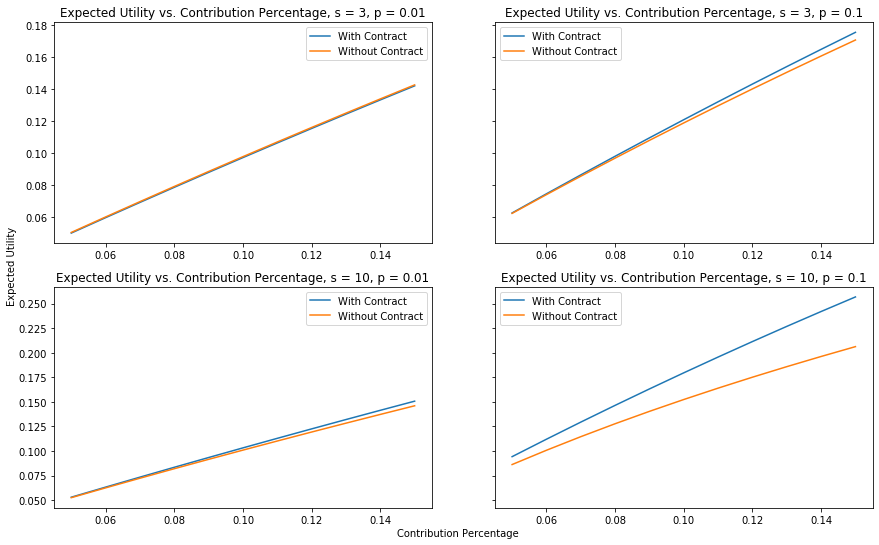

In [42]:
fig, axs = plt.subplots(2, 2, sharey='row',tight_layout=True,figsize=(12.5,7.5))
axs[0][0].plot(C, util_p1, label='With Contract')
axs[0][0].plot(C, util_np1, label='Without Contract')
axs[0][0].legend(loc='best')
axs[0][0].set_title('Expected Utility vs. Contribution Percentage, s = 3, p = 0.01')

axs[0][1].plot(C, util_p2, label='With Contract')
axs[0][1].plot(C, util_np2,label='Without Contract')
axs[0][1].legend(loc='best')
axs[0][1].set_title('Expected Utility vs. Contribution Percentage, s = 3, p = 0.1')

axs[1][0].plot(C, util_p3, label='With Contract')
axs[1][0].plot(C, util_np3, label='Without Contract')
axs[1][0].legend(loc='best')
axs[1][0].set_title('Expected Utility vs. Contribution Percentage, s = 10, p = 0.01')

axs[1][1].plot(C, util_p4, label='With Contract')
axs[1][1].plot(C, util_np4, label='Without Contract')
axs[1][1].legend(loc='best')
axs[1][1].set_title('Expected Utility vs. Contribution Percentage, s = 10, p = 0.1')

fig.text(0.5,0.005, "Contribution Percentage", ha="center", va="center")
fig.text(0.005,0.5, "Expected Utility", ha="center", va="center", rotation=90)

## Testing sensitivity to F (service fee percentage)

In [43]:
n = 3
C = 0.1 
F = np.arange(0.005, 0.05, 0.005)
m = 1 # set to 1 for simplicity
s1 = 3 # set to 10 for simplicity
s2 = 10
p1 = 0.01 # set to 0.1 for simplicity
p2 = 0.1
lam = 1 # set to 1 for simplicity

### Question 1: How does utility change as F changes? How does utility with the contract compare to utility without the contract?

In [44]:
util_p1 = eu_p(lam, m, s1, p1, n, C, F)
util_np1 = eu_np(lam, m, s1, p1, C) * np.ones(len(F))

util_p2 = eu_p(lam, m, s1, p2, n, C, F)
util_np2 = eu_np(lam, m, s1, p2, C) * np.ones(len(F))

util_p3 = eu_p(lam, m, s2, p1, n, C, F)
util_np3 = eu_np(lam, m, s2, p1, C) * np.ones(len(F))

util_p4 = eu_p(lam, m, s2, p2, n, C, F)
util_np4 = eu_np(lam, m, s2, p2, C) * np.ones(len(F))

Text(0.005, 0.5, 'Expected Utility')

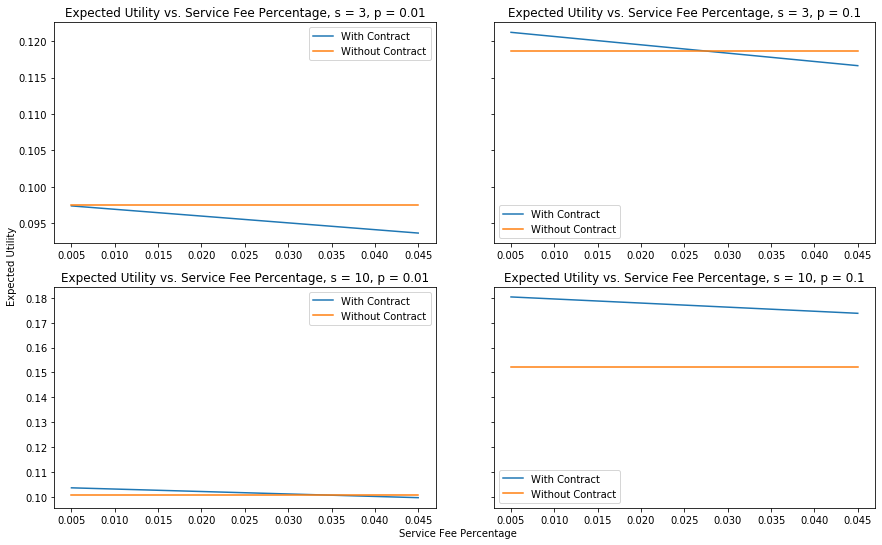

In [45]:
fig, axs = plt.subplots(2, 2, sharey='row',tight_layout=True,figsize=(12.5,7.5))
axs[0][0].plot(F, util_p1, label='With Contract')
axs[0][0].plot(F, util_np1, label='Without Contract')
axs[0][0].legend(loc='best')
axs[0][0].set_title('Expected Utility vs. Service Fee Percentage, s = 3, p = 0.01')

axs[0][1].plot(F, util_p2, label='With Contract')
axs[0][1].plot(F, util_np2,label='Without Contract')
axs[0][1].legend(loc='best')
axs[0][1].set_title('Expected Utility vs. Service Fee Percentage, s = 3, p = 0.1')

axs[1][0].plot(F, util_p3, label='With Contract')
axs[1][0].plot(F, util_np3, label='Without Contract')
axs[1][0].legend(loc='best')
axs[1][0].set_title('Expected Utility vs. Service Fee Percentage, s = 10, p = 0.01')

axs[1][1].plot(F, util_p4, label='With Contract')
axs[1][1].plot(F, util_np4, label='Without Contract')
axs[1][1].legend(loc='best')
axs[1][1].set_title('Expected Utility vs. Service Fee Percentage, s = 10, p = 0.1')

fig.text(0.5,0.005, "Service Fee Percentage", ha="center", va="center")
fig.text(0.005,0.5, "Expected Utility", ha="center", va="center", rotation=90)

### Next steps

Success multiple has a large impact on how utility compares with/without the contract. If success multiple is high enough, pool members achieve much greater utility with the contract regardless of p, n, C, F (Pando can charge huge fees). For lower success multiples, the positive difference in utility with the contract vs. without the contract is much smaller as p, n, and C change and pool members even experience lower utility beyond a certain fee.

- Inlude analysis of same sensitivities with high and low success multiples
- Report findings to Prof. Holen
- Calculate minimum success multiple to achieve equal or greater utility (all else constant)
- Calculate maximum fee given a certain success multiple (and all else constant)